# 統計的推測

## 点推定

ある確率分布$f(x|\boldsymbol{\theta})$を想定し、その未知の母数$\boldsymbol{\theta}=(\theta_1, ..., \theta_k)$を、その確率分布に従うランダムに抽出した$n$個の標本$\boldsymbol{X}=(X_1,...,X_n)$にもとづいて推定する問題を考える。

::::{margin}
:::{card} 推定量と推定値
確率変数$\boldsymbol{X}$でパラメータ$\boldsymbol{\theta}$を推定する関数を$\boldsymbol{\theta}$の**推定量**（estimator）といい、$\hat{\boldsymbol{\theta}}(\boldsymbol{X})$あるいは$\hat{\boldsymbol{\theta}}$と書く。$\boldsymbol{X}$の実現値$\boldsymbol{x}=(x_1,...,x_n)$を代入したもの$\hat{\boldsymbol{\theta}}(\boldsymbol{x})$を**推定値**（estimate）という。
:::
::::


### モーメント法

$$
X_1, ..., X_n, i.i.d. \sim f(x|\boldsymbol{\theta})
$$

のランダムサンプルについて、モーメント $E[X^r]$ を標本モーメント $\frac{1}{n} \sum^n_{i=1} X_i^r$ で置き換え

$$
\begin{cases}
\displaystyle \frac{1}{n} \sum^n_{i=1} X_i = \mu_1' (\theta_1, ..., \theta_k) \\
\displaystyle \frac{1}{n} \sum^n_{i=1} X_i^2 = \mu_2' (\theta_1, ..., \theta_k) \\
\vdots\\
\displaystyle \frac{1}{n} \sum^n_{i=1} X_i^k = \mu_k' (\theta_1, ..., \theta_k) \\
\end{cases}
$$

の同時方程式を$\theta_1,...,\theta_k$について解くことによって推定量$\hat{\boldsymbol{\theta}}=(\hat{\theta}_1, ..., \hat{\theta}_k)$を得る。これを**モーメント推定量**（moment estimator）という。


:::{admonition} 例
$X \sim N(\mu, \sigma^2)$とすると、

$$
\begin{cases}
\displaystyle \frac{1}{n} \sum^n_{i=1} X_i = \mu\\
\displaystyle \frac{1}{n} \sum^n_{i=1} X_i^2 = \sigma^2 + \mu^2
\end{cases}
$$

より、

$$
\begin{align}
\hat{\mu} &= \frac{1}{n} \sum^n_{i=1} X_i\\
\hat{\sigma}^2 &= \frac{1}{n} \sum^n_{i=1} (X_i - \hat{\mu})^2\\
\end{align}
$$

が$\mu, \sigma^2$のモーメント推定量となる。
:::


::::{margin}
:::{card} $\mu_2 = \sigma^2 + \mu^2$について

$$
\begin{align}
\sigma^2 &= V(X) = E[(X - E[X])^2]\\
&= E[X^2 - 2 X E[X] + E[X]^2] \\
&= E[X^2] - 2E[X] E[X] + E[X]^2\\
&= E[X^2] - 2E[X]^2 + E[X]^2\\
&= E[X^2] - E[X]^2\\
&= \mu_2 - \mu^2
\end{align}
$$
:::
::::



### 最尤推定法

「得られた標本は確率が最大のもの（最も尤もらしいもの）が実現した」という仮定に基づき、もっともらしさの関数（尤度関数）を最大にするパラメータを推定する方法。

**尤度関数**（likelihood function）とは$X_1,...,X_n$の確率関数の積

$$
L(\boldsymbol{\theta}|\boldsymbol{X}) = \prod^n_{i=1} f(X_i|\boldsymbol{\theta})
$$

で、サンプルのもとでその$\theta$のもっともらしさを示す関数である。

確率の積は数学的には扱いにくいので、通常はその対数をとった**対数尤度**

$$
\log L(\boldsymbol{\theta}|\boldsymbol{X}) = \sum^n_{i=1} \log f(X_i|\boldsymbol{\theta})
$$

を扱う。

::::{admonition} 例：コイントス
コインを5回投げて2回表がでた（表を1とすると、$\boldsymbol{X}=(0,1,1,0,0)$）とする。

確率$p$で1をとるベルヌーイ分布の確率質量関数は

$$
P(X=1) = p, P(X=0)= 1-p
$$

であるため、尤度関数は

$$
\begin{align}
L(p|\boldsymbol{X})
&= (1-p) \times p \times p \times (1-p) \times (1-p)\\
&= p^2 (1-p)^{5-2}
\end{align}
$$

となり、尤度関数にいれる$p$の値を変えていくと

$$
\begin{align}
L(p=0.1|\boldsymbol{X}) = 0.1^2 \times 0.9^3 = 0.00729\\
L(p=0.5|\boldsymbol{X}) = 0.5^2 \times 0.5^3 = 0.03125\\
L(p=0.9|\boldsymbol{X}) = 0.9^2 \times 0.1^3 = 0.00081
\end{align}
$$

のようになる。これを繰り返すと次の図のように描くことができる。

:::{glue:figure} cointoss_likelihood
:::

そして、尤度関数を最大化するパラメータを点推定量として採用する。
::::

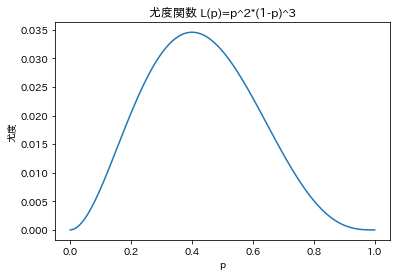

In [17]:
# 尤度関数のプロットを描いたコード
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

x = np.array([0, 1, 1, 0, 0])

def bernoulli(p, r, n):
    return p ** r * (1 - p) ** (n - r)

theta = np.linspace(0, 1, 100)
likelihood = [bernoulli(p, r = sum(x), n = len(x)) for p in theta]


fig, ax = plt.subplots()
ax.plot(theta, likelihood)
ax.set(xlabel='p', ylabel='尤度', title='尤度関数 L(p)=p^2*(1-p)^3')

from myst_nb import glue
glue("cointoss_likelihood", fig, display=False)

### MAP推定

**事後確率最大値**（maximum a posteriori: MAP）は事後分布の最頻値

In [20]:
# nest_asyncio: asyncioを使うstanをjupyterで使うための対処
import nest_asyncio
nest_asyncio.apply()

import stan

stan_code = """
data {
    int N;
    real X[N];
}
parameters {
    real<lower=0> n;
    real<lower=0, upper=1> p;
}
model {
    X ~ bernoulli(p);
}
"""

data = {
    "N": len(x),
    "X": x,
}

posterior = stan.build(stan_code, data=data, random_seed=1)
fit = posterior.sample(num_chains=4, num_samples=100)
df = fit.to_frame()
df

RuntimeError: Warning in '/tmp/httpstan_q9z6z_8h/model_c2cnvw3a.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Semantic error in '/tmp/httpstan_q9z6z_8h/model_c2cnvw3a.stan', line 11, column 4 to column 21:
   -------------------------------------------------
     9:  }
    10:  model {
    11:      X ~ bernoulli(p);
             ^
    12:  }
   -------------------------------------------------

Ill-typed arguments supplied to function 'bernoulli':
(array[] real, real)
Available signatures:
(int, row_vector) => real
  The first argument must be int but got array[] real
(int, vector) => real
  The first argument must be int but got array[] real
(int, array[] real) => real
  The first argument must be int but got array[] real
(int, real) => real
  The first argument must be int but got array[] real
(array[] int, row_vector) => real
  The first argument must be array[] int but got array[] real
(Additional signatures omitted)

In [12]:
# nest_asyncio: asyncioを使うstanをjupyterで使うための対処
import nest_asyncio
nest_asyncio.apply()

import stan

stan_code = """
data {
    int N;
    real X[N];
    real Y[N];
}
parameters {
    real a; 
    real b;
    real<lower=0> sigma;
}
model {
    for (n in 1:N) {
        Y[n] ~ normal(a * X[n] + b, sigma);
    }
}
"""

import numpy as np
x = np.random.uniform(size=100)
y = 10 + 5 * x + np.random.normal(size=100)

data = {
    "N": len(x),
    "X": x,
    "Y": y
}

posterior = stan.build(stan_code, data=data, random_seed=1)
fit = posterior.sample(num_chains=4, num_samples=100)
df = fit.to_frame()
df

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_f5g_k22j/model_iuz5kz76.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_f5g_k22j/model_iuz5kz76.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this m

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,a,b,sigma
draws,,,,,,,,,,
0,-42.801114,1.000000,0.290116,2.0,3.0,0.0,45.829875,4.632673,10.269763,1.037120
1,-42.450227,0.731577,0.420165,3.0,7.0,0.0,44.783000,4.452251,10.206611,0.953691
2,-41.174188,0.968916,0.308192,3.0,15.0,0.0,41.304353,5.124229,10.004806,0.915344
3,-42.247496,0.841800,0.383678,3.0,11.0,0.0,42.662264,4.808097,9.996633,1.013135
4,-41.963179,0.958529,0.290116,3.0,15.0,0.0,44.439816,5.054726,9.829253,0.888380
...,...,...,...,...,...,...,...,...,...,...
395,-42.683555,0.998712,0.383678,3.0,7.0,0.0,43.449058,5.455197,9.632969,0.909628
396,-42.153233,0.992322,0.290116,3.0,15.0,0.0,45.837368,4.939001,10.086040,1.031135
397,-42.323812,1.000000,0.420165,1.0,1.0,0.0,43.139564,4.895999,10.206233,0.887500


<AxesSubplot:ylabel='Frequency'>

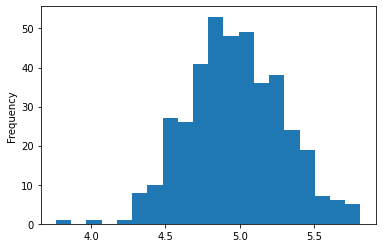

In [15]:
df["a"].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

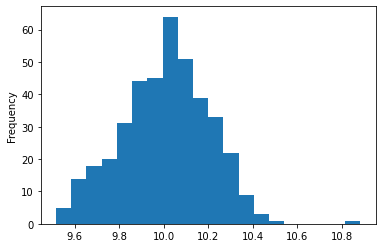

In [16]:
df["b"].plot.hist(bins=20)

### 例

あるゲームのガチャを1000回引いた結果、「外れ」と「当たり」の回数が以下のようになった。このガチャの「当たり」の確率はいくつか。

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.random.binomial(n=1, p=0.1, size=1000)
x = pd.Series(x)

table = x.map({0: "外れ", 1: "当たり"}).value_counts().to_frame()
table.columns = ['回数']
table.T

,外れ,当たり
回数,892,108


#### モーメント法による推定

<!-- 試行回数$n$、成功確率$p$の二項分布$Bi(n, p)$の平均は$np$であるため、標本平均を$n$で乗じれば$p$が推定できる

$$
\hat{p} = \frac{np}{n} = \frac{1}{n^2} \sum^n_{i=1} X_i
$$
 -->
 
ベルヌーイ分布$Ber(p)$の平均が成功確率$p$なので、$\hat{p} = \sum^n_{i=1} X_i / n$

In [69]:
# モーメント法による推定
n = len(x)
sum(x) / n

0.108

#### 最尤法による推定

ベルヌーイ分布

$X_i = 1$となる確率が$p$のベルヌーイ分布$Ber(p)$に従った確率変数の実現値がサンプルだとしたとき、$r=\sum X_i$とすると、その尤度関数は

$$
L(p|X) = p^r (1-p)^{n-r}
$$

であり、対数尤度関数は

$$
\log L(p|X) = r \log p + (n-r) \log (1-p)
$$

となる。

今回のサンプルのもとでは次の図のような曲線になる。（グレーの縦線は最尤推定値のpを示す）

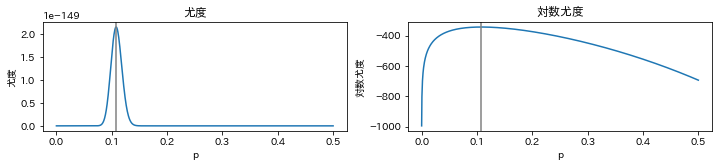

In [83]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 2))

# 尤度関数
p_candidates = np.linspace(0.0001, 0.5, 1000)
likelihood = np.array([bernoulli(p, n = len(x), r = sum(x)) for p in p_candidates])
max_p = p_candidates[np.argmax(likelihood)]  # 最尤推定値

axes[0].plot(p_candidates, likelihood)
axes[0].set(xlabel='p', ylabel='尤度', title='尤度')
axes[0].axvline(max_p, color="gray")


# 対数尤度関数
def log_bernoulli(p, n, r):
    return r * np.log(p) + (n - r) * np.log(1 - p)

likelihood = np.array([log_bernoulli(p, n = len(x), r = sum(x)) for p in p_candidates])
max_p = p_candidates[np.argmax(likelihood)]  # 最尤推定値

axes[1].plot(p_candidates, likelihood)
axes[1].set(xlabel='p', ylabel='対数尤度', title='対数尤度')
axes[1].axvline(max_p, color="gray")

fig.show()

対数尤度の導関数は

$$
\frac{\partial \log L(p|X)}{\partial p} = \frac{r}{p} - \frac{n-r}{1-p}
$$

で、これを0とおいて$p$について解くと

$$
p = \frac{r}{n} = \frac{\sum X_i}{n}
$$

となり、モーメント法と同じ結果になる。

:::{card} 式展開
:class: dropdown

$$
\frac{\partial \log L(p|X)}{\partial p} = \frac{r}{p} - \frac{n-r}{1-p} = 0
$$

$$
\begin{align}
\frac{r}{p} &= \frac{n-r}{1-p}\\
\frac{p}{1-p} &= \frac{r}{n-r}\\
p &= \frac{r(1-p)}{n-r} = \frac{r(1-p)}{r(\frac{n}{r} - 1)} = \frac{1-p}{\frac{n}{r} - 1}\\
p (\frac{n}{r} - 1) &= 1 - p\\
p \frac{n}{r} = 1\\
p = \frac{r}{n}
\end{align}
$$
:::


解析的に解くことができない場合は勾配降下法などで数値的に解く。

## 区間推定